In [9]:
import sklearn 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
cars = pd.read_csv(r'C:\Users\Alexey\data\cars.csv')

In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [35]:
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [36]:
cars['mileage'] = cars['mileage'].str.split(' ').str[0]
cars['mileage'] = pd.to_numeric(cars['mileage'])

In [37]:
cars['engine'] = cars['engine'].str.split(' ').str[0]
cars['engine'] = pd.to_numeric(cars['engine'])

In [38]:
cars.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power', 'torque'], axis=1, inplace=True)

In [39]:
cars.dropna(inplace = True)

In [40]:
cars['seats'] = cars['seats'].astype(int)

In [41]:
# переставляем колонки для наглядности
cars = cars[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'seats']]

In [45]:
cars.describe()

,selling_price,year,km_driven,mileage,engine,seats
count,7.907000e+03,7907.000000,7.907000e+03,7907.000000,7907.000000,7907.000000
mean,6.497417e+05,2013.982168,6.919256e+04,19.418783,1458.625016,5.416719
std,8.135565e+05,3.866650,5.678976e+04,4.037145,503.916303,0.959588
min,2.999900e+04,1994.000000,1.000000e+00,0.000000,624.000000,2.000000
25%,2.700000e+05,2012.000000,3.500000e+04,16.780000,1197.000000,5.000000
50%,4.500000e+05,2015.000000,6.000000e+04,19.300000,1248.000000,5.000000
75%,6.900000e+05,2017.000000,9.575000e+04,22.320000,1582.000000,5.000000
max,1.000000e+07,2020.000000,2.360457e+06,42.000000,3604.000000,14.000000


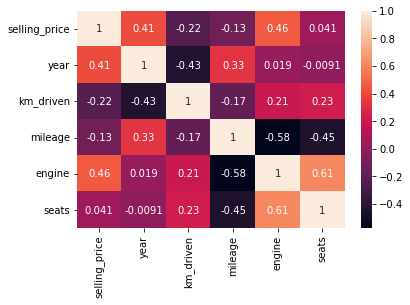

In [42]:
hm = sns.heatmap(cars.corr(), cbar=True, annot=True)

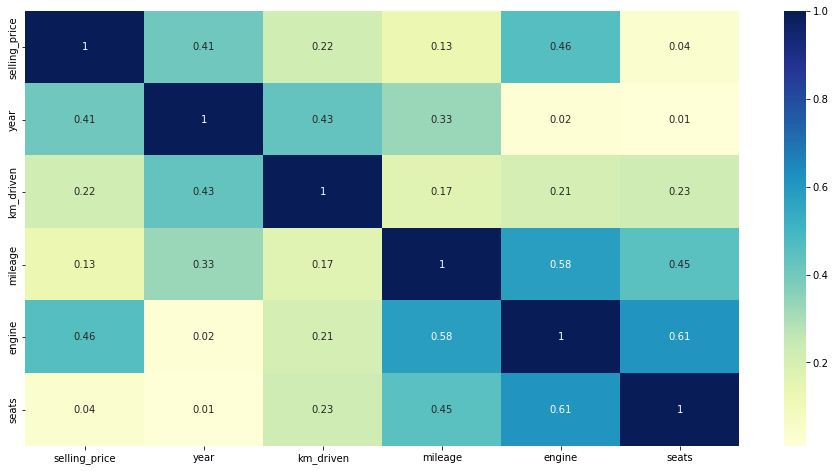

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(data=cars.corr().abs().round(2), annot=True, cmap="YlGnBu", center=0.5, ax=ax);

In [53]:
## Регрессионный анализ

In [44]:
X = cars[['year', 'km_driven', 'mileage', 'engine', 'seats']].values
y = cars['selling_price'].values

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
slr = LinearRegression() # создали экземпляр
slr.fit(X, y)  # обучаем модель
y_pred = slr.predict(X) # получаем предсказания
print(f'Slope: {slr.coef_[0]:.2f}')       # Коэффицент наклона прямой
print(f'Intercept: {slr.intercept_:.2f}') # Коэффицент сдвига по оси Y

Slope: 73705.71
Intercept: -147477012.93


In [47]:
slr.score(X, y)

0.47000040403148924

### Проверка качества модели:

In [48]:
from sklearn.model_selection import train_test_split
# разбиваем выборке на две части(тренировочную и тестовую)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train.shape, X_test.shape

((5534, 5), (2373, 5))

In [50]:
slr = LinearRegression()
# обучаем модель
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
       mean_absolute_error(y_train, y_train_pred),
       mean_absolute_error(y_test, y_test_pred)))

MSE train: 334436355853.923, test: 392510702438.117
R^2 train: 0.481, test: 0.441
MAE train: 328319.289, test: 348513.918


In [52]:
# разбиваем данные по 'seats'
np.sort(cars['seats'].unique())

array([ 2,  4,  5,  6,  7,  8,  9, 10, 14])

In [54]:
car_type = {2: "sport", 4: "usual", 5: "usual", 6: "large", 7: "large", 8: "large", 9: "large", 10: "large", 14: "large"}
cars['type'] = cars['seats'].map(car_type)

C:\Users\Alexey\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
cars = cars[cars['type'] == "usual"] 
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6387 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6387 non-null   int64  
 1   year           6387 non-null   int64  
 2   km_driven      6387 non-null   int64  
 3   mileage        6387 non-null   float64
 4   engine         6387 non-null   float64
 5   seats          6387 non-null   int32  
 6   type           6387 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 374.2+ KB


In [56]:
X = cars[['year', 'km_driven', 'mileage', 'engine']].values
y = cars['selling_price'].values

In [57]:
slr = LinearRegression() # создали экземпляр
slr.fit(X, y)  # обучаем модель
y_pred = slr.predict(X) # получаем предсказания
print(f'Slope: {slr.coef_[0]:.2f}')       # Коэффицент наклона прямой
print(f'Intercept: {slr.intercept_:.2f}') # Коэффицент сдвига по оси Y

Slope: 58611.30
Intercept: -119057650.57


In [58]:
slr.score(X, y)

0.5348063521659515

In [59]:
from sklearn.model_selection import train_test_split
# разбиваем выборке на две части(тренировочную и тестовую)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
slr = LinearRegression()
# обучаем модель
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('MAE train: {:.3f}, test: {:.3f}'.format(
       mean_absolute_error(y_train, y_train_pred),
       mean_absolute_error(y_test, y_test_pred)))

MSE train: 321706977173.117, test: 420635058904.723
R^2 train: 0.556, test: 0.466
MAE train: 335278.610, test: 348250.650


In [85]:
# tensor flow

In [62]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.6.2'

In [64]:
# убираем столбец type
cars = cars[['selling_price', 'year', 'km_driven', 'mileage', 'engine']]

In [65]:
X = cars.loc[:, cars.columns != 'selling_price'].values
X = np.array(X, dtype=np.float64)
y = cars['selling_price'].values
y = np.array(y, dtype=np.float64)

In [66]:
from sklearn.model_selection import train_test_split
# разбиваем выборке на две части(тренировочную и тестовую)
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Отобразим прогресс тренировки, печатая по одной точке на каждую завершенную эпоху 
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')

EPOCHS = 500

# Сохраним тренировочную статистику
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


.
.
.
.
.

In [69]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print(f"Testing set Mean Abs Error: ${mae * 1000:7.2f}")

Testing set Mean Abs Error: $206192343.75


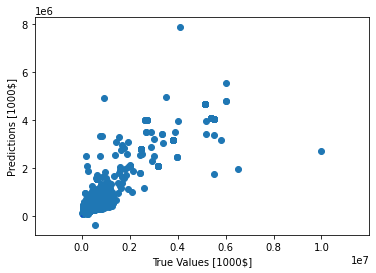

In [70]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100], 'b', alpha=0.5);

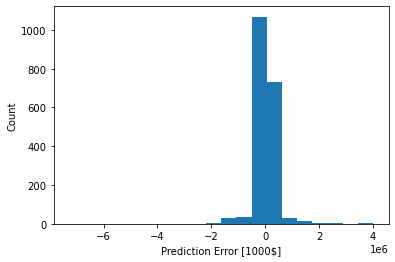

In [71]:
error = test_predictions - test_labels
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error [1000$]")
plt.ylabel("Count");